# BigFive Survey

In [12]:
import pandas as pd

# Load the data from the CSV file
file_path = './survey/BigFive.csv'
big_five_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its columns to understand its structure
big_five_data.head(), big_five_data.columns


(   uid type I see myself as someone who...   - 1. Is talkative  \
 0  u00  pre                                     Agree a little   
 1  u01  pre                         Neither agree nor disagree   
 2  u02  pre                                  Disagree a little   
 3  u03  pre                                  Disagree a little   
 4  u04  pre                                  Disagree a little   
 
   I see myself as someone who...   - 2. Tends to find fault with others  \
 0                         Neither agree nor disagree                      
 1                                     Agree a little                      
 2                                     Agree a little                      
 3                         Neither agree nor disagree                      
 4                         Neither agree nor disagree                      
 
   I see myself as someone who...   - 3. Does a thorough job  \
 0                         Neither agree nor disagree          
 1        

In [13]:
for column in big_five_data.columns[2:5]:  # Check first three survey columns
    print(f"Unique values in {column}: {big_five_data[column].astype(str).str.strip().str.title().unique()}")
    
response_mapping = {
    'Disagree Strongly': 1,
    'Disagree A Little': 2,
    'Neither Agree Nor Disagree': 3,
    'Agree A Little': 4,
    'Agree Strongly': 5
}

# Apply the mapping to replace the textual responses with numeric scores
for column in big_five_data.columns[2:]:  # Assuming first two columns are 'uid' and 'type'
    big_five_data[column] = big_five_data[column].astype(str).str.title().map(response_mapping)

Unique values in I see myself as someone who...   - 1. Is talkative: ['Agree A Little' 'Neither Agree Nor Disagree' 'Disagree A Little'
 'Disagree Strongly' 'Agree Strongly']
Unique values in I see myself as someone who...   - 2. Tends to find fault with others: ['Neither Agree Nor Disagree' 'Agree A Little' 'Disagree Strongly'
 'Agree Strongly' 'Disagree A Little']
Unique values in I see myself as someone who...   - 3. Does a thorough job: ['Neither Agree Nor Disagree' 'Agree Strongly' 'Agree A Little'
 'Disagree A Little']


In [14]:
print("NaN counts after mapping:")
print(big_five_data.isna().sum())

# Fill NaN values if any exist
big_five_data.fillna(3, inplace=True)  # Assuming 3 is the neutral score

NaN counts after mapping:
uid                                                                                     0
type                                                                                    0
I see myself as someone who...   - 1. Is talkative                                      0
I see myself as someone who...   - 2. Tends to find fault with others                   0
I see myself as someone who...   - 3. Does a thorough job                               0
I see myself as someone who...   - 4. Is depressed, blue                                0
I see myself as someone who...   - 5. Is original, comes up with new ideas              0
I see myself as someone who...   - 6. Is reserved                                       0
I see myself as someone who...   - 7. Is helpful and unselfish with others              0
I see myself as someone who...   - 8. Can be somewhat careless                          2
I see myself as someone who...   - 9. Is relaxed, handles stress well.    

In [15]:
print("Unique 'type' values before adjustment:", big_five_data['type'].unique())

# Normalize 'type' field for consistency
big_five_data['type'] = big_five_data['type'].str.strip().str.title()

# Verify 'uid' consistency and format
print("Unique 'uid' values check (sample):", big_five_data['uid'].sample(5))

# Identify participants who have both Pre and Post data
pre_participants = set(big_five_data[big_five_data['type'] == 'Pre']['uid'])
post_participants = set(big_five_data[big_five_data['type'] == 'Post']['uid'])
common_participants = pre_participants & post_participants

print(f"Number of participants in Pre only: {len(pre_participants)}")
print(f"Number of participants in Post only: {len(post_participants)}")
print(f"Number of common participants: {len(common_participants)}")

# Filter datasets to only include common participants
pre_data = big_five_data[(big_five_data['type'] == 'Pre') & (big_five_data['uid'].isin(common_participants))]
post_data = big_five_data[(big_five_data['type'] == 'Post') & (big_five_data['uid'].isin(common_participants))]

# Save the filtered data
pre_data.to_csv('./data/BigFive/BigFive_Pre.csv', index=False)
post_data.to_csv('./data/BigFive/BigFive_Post.csv', index=False)

# Check final data counts
print("Final Pre data counts (non-NaN):")
print(pre_data.count())
print("\nFinal Post data counts (non-NaN):")
print(post_data.count())


Unique 'type' values before adjustment: ['pre' 'post']
Unique 'uid' values check (sample): 16    u18
73    u43
38    u50
57    u16
76    u47
Name: uid, dtype: object
Number of participants in Pre only: 46
Number of participants in Post only: 39
Number of common participants: 38
Final Pre data counts (non-NaN):
uid                                                                                     38
type                                                                                    38
I see myself as someone who...   - 1. Is talkative                                      38
I see myself as someone who...   - 2. Tends to find fault with others                   38
I see myself as someone who...   - 3. Does a thorough job                               38
I see myself as someone who...   - 4. Is depressed, blue                                38
I see myself as someone who...   - 5. Is original, comes up with new ideas              38
I see myself as someone who...   - 6. Is reserved  

In [16]:
traits = {
    "Extraversion": [1, 6, 11, 16, 21, 26, 31, 36],
    "Agreeableness": [2, 7, 12, 17, 22, 27, 32, 37, 42],
    "Conscientiousness": [3, 8, 13, 18, 23, 28, 33, 38, 43],
    "Neuroticism": [4, 9, 14, 19, 24, 29, 34, 39],
    "Openness": [5, 10, 15, 20, 25, 30, 35, 40, 41, 44]
}

reverse_indices = {
    "Extraversion": [6, 21, 31],
    "Agreeableness": [2, 12, 27, 37],
    "Conscientiousness": [8, 18, 23, 43],
    "Neuroticism": [9, 24, 34],
    "Openness": [35, 41]
}

# Reverse scoring function
def reverse_score(score):
    return 6 - score

In [17]:
pre_data = pd.read_csv('./data/BigFive/BigFive_Pre.csv')
post_data = pd.read_csv('./data/BigFive/BigFive_Post.csv')

def calculate_trait_scores(data):
    # Exclude the last two columns ('student_id', 'type') from the trait calculation
    trait_scores = pd.DataFrame(index=data.index)
    
    for trait, questions in traits.items():
        scores = []
        for q in questions:
            column_name = data.columns[q + 1]  # Adjusted for zero-based indexing
            if q in reverse_indices.get(trait, []):
                scores.append(data[column_name].apply(reverse_score))
            else:
                scores.append(data[column_name])
        trait_scores[trait] = pd.DataFrame(scores).sum(axis=0)
    
    return trait_scores

pre_trait_scores = calculate_trait_scores(pre_data)
post_trait_scores = calculate_trait_scores(post_data)

# Include identification columns
pre_trait_scores['uid'] = pre_data['uid']
pre_trait_scores['type'] = 'Pre'
post_trait_scores['uid'] = post_data['uid']
post_trait_scores['type'] = 'Post'

# Save the detailed scores datasets
pre_trait_scores.to_csv('./data/BigFive/pre_trait_scores.csv', index=False)
post_trait_scores.to_csv('./data/BigFive/post_trait_scores.csv', index=False)

# Output average scores
average_scores_pre = pre_trait_scores.drop(columns=['uid', 'type']).mean()
average_scores_post = post_trait_scores.drop(columns=['uid', 'type']).mean()
print("Average Scores (Pre):", average_scores_pre)
print("\nAverage Scores (Post):", average_scores_post)


Average Scores (Pre): Extraversion         23.657895
Agreeableness        32.894737
Conscientiousness    30.447368
Neuroticism          23.684211
Openness             35.657895
dtype: float64

Average Scores (Post): Extraversion         23.736842
Agreeableness        32.789474
Conscientiousness    31.236842
Neuroticism          24.000000
Openness             35.973684
dtype: float64


### Interpretation of Each Trait:


Extraversion (Pre: 23.66, Post: 23.74)

Trait Description: Indicates how outgoing, social, and energetic a person is.

Change Observed: A very slight increase in the average score suggests a marginal increase in sociability or activity levels. The change is minimal, indicating that overall extraversion levels have remained stable.


Agreeableness (Pre: 32.89, Post: 32.79)

Trait Description: Reflects a person's orientation towards cooperation, social harmony, and consideration for others.

Change Observed: The slight decrease suggests a small reduction in these tendencies. However, the change is very minor, suggesting that agreeableness has largely remained consistent.


Conscientiousness (Pre: 30.45, Post: 31.24)

Trait Description: Measures reliability, organization, and rule-following.

Change Observed: This trait shows a noticeable increase, which might indicate improvements in self-discipline, orderliness, or responsibility. This is one of the more significant changes observed, suggesting a potential shift towards more structured or diligent behavior.


Neuroticism (Pre: 23.68, Post: 24.00)

Trait Description: Indicates emotional stability and tendency towards anxiety or mood swings.

Change Observed: A slight increase in neuroticism could imply a small rise in emotional sensitivity or stress levels. However, this change is relatively minor.


Openness (Pre: 35.66, Post: 35.97)

Trait Description: Reflects one's openness to new experiences, intellectual curiosity, and creativity.

Change Observed: A minor increase suggests a slight growth in creativity, curiosity, or willingness to embrace new ideas.

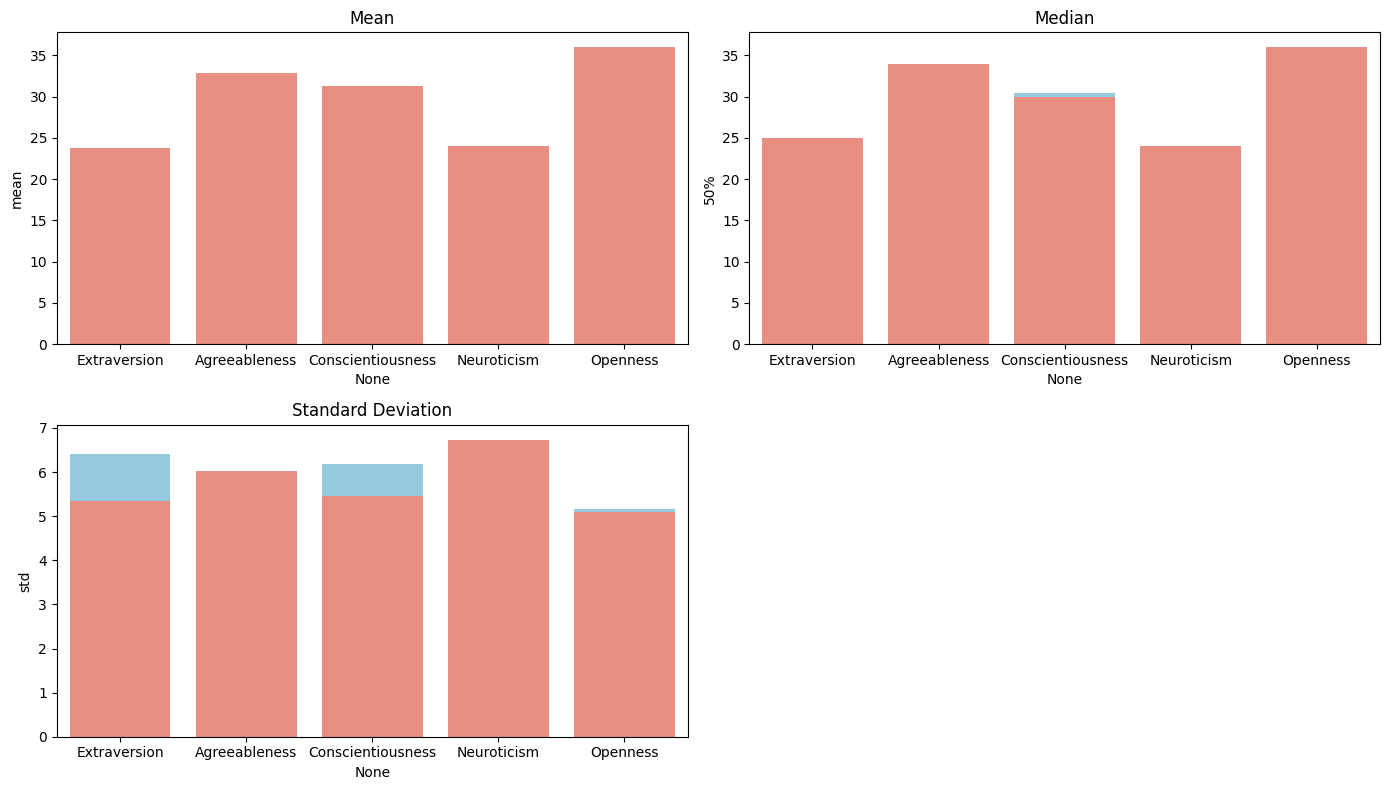

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

pre_statistics = pre_trait_scores.describe().loc[['mean', '50%', 'std']].T
post_statistics = post_trait_scores.describe().loc[['mean', '50%', 'std']].T

# Plotting
plt.figure(figsize=(14, 8))

# Plot mean
plt.subplot(2, 2, 1)
sns.barplot(x=pre_statistics.index, y=pre_statistics['mean'], color='skyblue')
sns.barplot(x=post_statistics.index, y=post_statistics['mean'], color='salmon')
plt.title('Mean')

# Plot median
plt.subplot(2, 2, 2)
sns.barplot(x=pre_statistics.index, y=pre_statistics['50%'], color='skyblue')
sns.barplot(x=post_statistics.index, y=post_statistics['50%'], color='salmon')
plt.title('Median')

# Plot standard deviation
plt.subplot(2, 2, 3)
sns.barplot(x=pre_statistics.index, y=pre_statistics['std'], color='skyblue')
sns.barplot(x=post_statistics.index, y=post_statistics['std'], color='salmon')
plt.title('Standard Deviation')

# Adjust layout
plt.tight_layout()
plt.show()

## Visualization of the Data

<Figure size 1000x600 with 0 Axes>

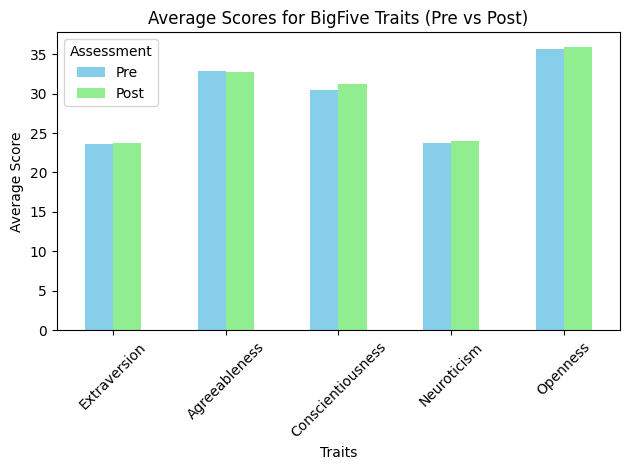

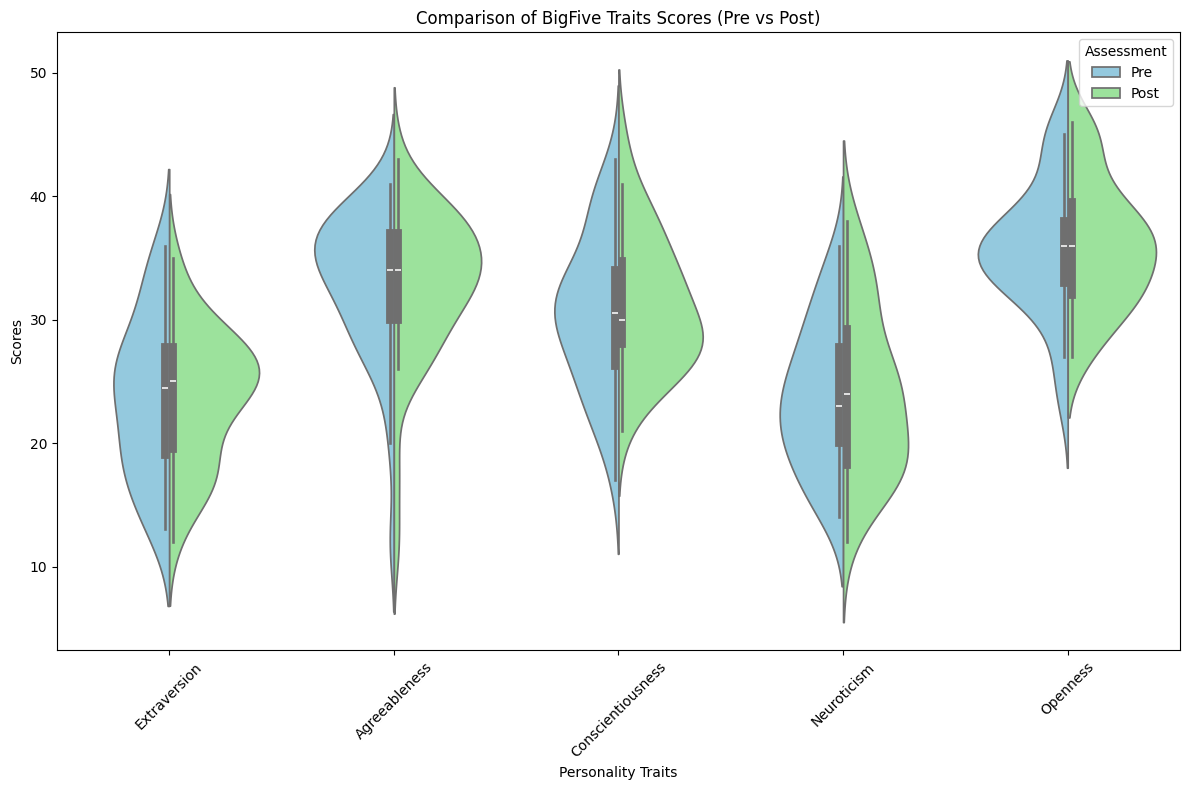

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data if not already loaded
pre_trait_scores = pd.read_csv('./data/BigFive/pre_trait_scores.csv')
post_trait_scores = pd.read_csv('./data/BigFive/post_trait_scores.csv')

# Prepare data for plotting
traits = ["Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"]
pre_means = pre_trait_scores[traits].mean()
post_means = post_trait_scores[traits].mean()

# Dataframe for plotting
df = pd.DataFrame({'Pre': pre_means, 'Post': post_means})

# Bar Plot of Average Scores
plt.figure(figsize=(10, 6))
df.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Scores for BigFive Traits (Pre vs Post)')
plt.ylabel('Average Score')
plt.xlabel('Traits')
plt.xticks(rotation=45)
plt.legend(title='Assessment')
plt.tight_layout()
plt.show()

# Violin Plots for each trait to visualize distribution changes
pre_trait_scores['Assessment'] = 'Pre'
post_trait_scores['Assessment'] = 'Post'

# Concatenate the two DataFrames into a single one for easier plotting
combined_data = pd.concat([pre_trait_scores, post_trait_scores], ignore_index=True)

# Melting the DataFrame to make it suitable for seaborn's boxplot
melted_data = pd.melt(combined_data, id_vars=['uid', 'Assessment'], value_vars=["Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"],
                      var_name='Trait', value_name='Score')

# Plotting
plt.figure(figsize=(12, 8))
sns.violinplot(x='Trait', y='Score', hue='Assessment', data=melted_data, palette=['skyblue', 'lightgreen'], split=True)
plt.title('Comparison of BigFive Traits Scores (Pre vs Post)')
plt.xlabel('Personality Traits')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Assessment')
plt.tight_layout()
plt.show()


## Paired T-Test

It appears that some participants did not complete the post-assessment

In [20]:
from scipy.stats import ttest_rel

# Load data
pre_scores = pd.read_csv('./data/BigFive/pre_trait_scores.csv')
post_scores = pd.read_csv('./data/BigFive/post_trait_scores.csv')

# List of traits
traits = ["Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"]

# Dictionary to hold test results
test_results = {}

# Conducting paired t-tests
for trait in traits:
    # Dropping NaN values to ensure the test is valid (should not be necessary now but good practice)
    pre_data = pre_scores[trait].dropna()
    post_data = post_scores[trait].dropna()

    # Check if there's enough data to perform t-test
    if len(pre_data) > 1 and len(pre_data) == len(post_data):
        t_stat, p_value = ttest_rel(pre_data, post_data)
        test_results[trait] = {'t-statistic': t_stat, 'p-value': p_value}
    else:
        test_results[trait] = {'t-statistic': None, 'p-value': 'Insufficient data'}

# Displaying the results
for trait, result in test_results.items():
    print(f"{trait} - t-statistic: {result['t-statistic']}, p-value: {result['p-value']}")


Extraversion - t-statistic: -0.15672573626014516, p-value: 0.8763130822624591
Agreeableness - t-statistic: 0.25500267065006266, p-value: 0.8001331624394692
Conscientiousness - t-statistic: -1.8072041006582122, p-value: 0.07886717581231559
Neuroticism - t-statistic: -0.6056740795251583, p-value: 0.5484288237894358
Openness - t-statistic: -0.7426660050325825, p-value: 0.46237321640597084


### Overall Analysis:
None of the personality traits showed statistically significant changes based on the paired t-tests, as all p-values are well above the commonly accepted threshold of 0.05. This suggests that the traits measured remained relatively stable over the period between the two assessments.

The results indicate that any interventions or experiences occurring between the two measurements either did not impact these personality traits significantly or that the sample size or variation within the sample masked potential effects.